<a href="https://colab.research.google.com/github/Avspraveenreddy/AML/blob/main/varimand_64061.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:

train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_labels[0]

1

In [ ]:
max([max(sequence) for sequence in train_data])

9999

In [ ]:
#Preparing The data
# Function to vectorize integer sequences into multi-hot encoded vectors

import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [ ]:
# Importing necessary modules

from tensorflow import keras
from tensorflow.keras import layers

# Initialize a sequential model
model = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Compiling the model:
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])

# Splitting the training data:
x_values = x_train[:10000]
p_x_train = x_train[10000:]

# Splitting the labels:
y_values = y_train[:10000]
p_y_train = y_train[10000:]

# Fitting the model on the training data for 17 epochs, using a batch size of 1024
# Validation is done using the held-out validation data (x_values, y_values)
history = model.fit(p_x_train, p_y_train, epochs=12, batch_size=1024, validation_data=(x_values, y_values))


Epoch 1/12
15/15 [==============================] - 2s 93ms/step - loss: 0.5942 - accuracy: 0.6933 - val_loss: 0.4588 - val_accuracy: 0.8512
Epoch 2/12
15/15 [==============================] - 0s 21ms/step - loss: 0.4143 - accuracy: 0.8493 - val_loss: 0.3696 - val_accuracy: 0.8704
Epoch 3/12
15/15 [==============================] - 0s 21ms/step - loss: 0.3176 - accuracy: 0.8913 - val_loss: 0.3261 - val_accuracy: 0.8716
Epoch 4/12
15/15 [==============================] - 0s 21ms/step - loss: 0.2615 - accuracy: 0.9091 - val_loss: 0.2906 - val_accuracy: 0.8879
Epoch 5/12
15/15 [==============================] - 0s 22ms/step - loss: 0.2216 - accuracy: 0.9254 - val_loss: 0.2864 - val_accuracy: 0.8857
Epoch 6/12
15/15 [==============================] - 0s 20ms/step - loss: 0.2019 - accuracy: 0.9281 - val_loss: 0.2927 - val_accuracy: 0.8824
Epoch 7/12
15/15 [==============================] - 0s 20ms/step - loss: 0.1730 - accuracy: 0.9425 - val_loss: 0.3061 - val_accuracy: 0.8774
Epoch 8/12
15

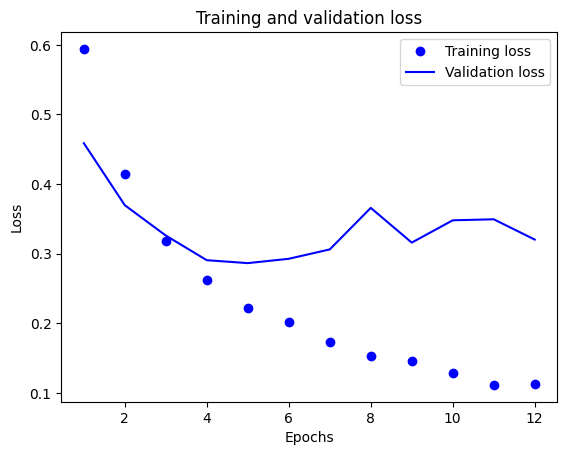

In [ ]:
import matplotlib.pyplot as plt
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

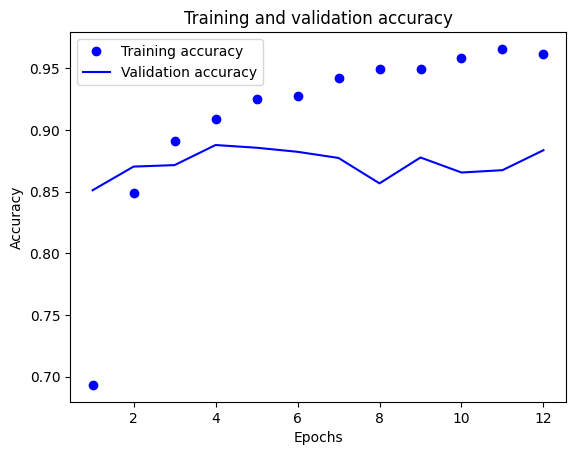

In [ ]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [ ]:
results = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 0.3396 - accuracy: 0.8707


In [ ]:
results

[0.3396032154560089, 0.8706799745559692]

#Question 1 - Using 1 Layer

In [ ]:

# Initialize a sequential model with layers
model1 = keras.Sequential([
     # First layer with 32 units
    layers.Dense(32, activation="relu"),

    # Output layer with 1 unit
    layers.Dense(1, activation="sigmoid")
])


# Compiling the model
model1.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


# Training the model on the partial training data for 12 epochs with a batch size of 1024
# Validation will be performed using the data from x_values and y_values
history = model1.fit(p_x_train, p_y_train, epochs=12, batch_size=1024, validation_data=(x_values, y_values))

Epoch 1/12
15/15 [==============================] - 2s 91ms/step - loss: 0.5590 - accuracy: 0.7779 - val_loss: 0.4344 - val_accuracy: 0.8473
Epoch 2/12
15/15 [==============================] - 0s 21ms/step - loss: 0.3490 - accuracy: 0.8885 - val_loss: 0.3395 - val_accuracy: 0.8749
Epoch 3/12
15/15 [==============================] - 0s 21ms/step - loss: 0.2625 - accuracy: 0.9173 - val_loss: 0.3039 - val_accuracy: 0.8865
Epoch 4/12
15/15 [==============================] - 0s 21ms/step - loss: 0.2152 - accuracy: 0.9333 - val_loss: 0.2886 - val_accuracy: 0.8868
Epoch 5/12
15/15 [==============================] - 0s 20ms/step - loss: 0.1830 - accuracy: 0.9458 - val_loss: 0.2832 - val_accuracy: 0.8876
Epoch 6/12
15/15 [==============================] - 0s 20ms/step - loss: 0.1587 - accuracy: 0.9561 - val_loss: 0.2818 - val_accuracy: 0.8874
Epoch 7/12
15/15 [==============================] - 0s 21ms/step - loss: 0.1387 - accuracy: 0.9635 - val_loss: 0.2836 - val_accuracy: 0.8863
Epoch 8/12
15

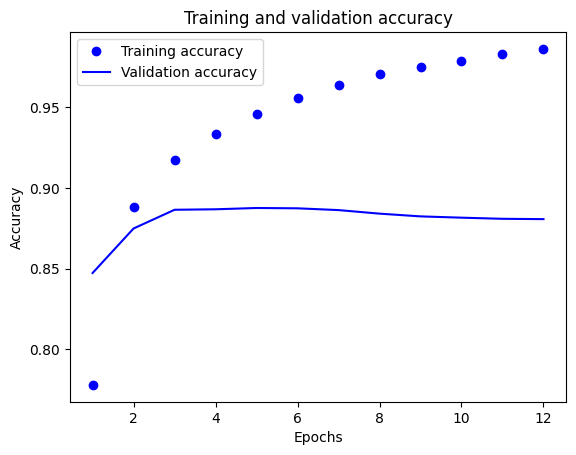

In [ ]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# Evaluating the results
results = model1.evaluate(x_test, y_test)
results

782/782 [==============================] - 1s 2ms/step - loss: 0.3403 - accuracy: 0.8686


[0.34026235342025757, 0.8685600161552429]

#Question 2 - With few or more hidden units for two layers and one layer

#Part 1

# More hidden units for one layer

In [ ]:


# Initialize a sequential model with layers
model1 = keras.Sequential([
     # First layer with 64 units
    layers.Dense(64, activation="relu"),

    # Output layer with 1 unit
    layers.Dense(1, activation="sigmoid")
])


# Compiling the model
model1.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


# Training the model on the partial training data for 12 epochs with a batch size of 1024
# Validation will be performed using the data from x_values and y_values
history = model1.fit(p_x_train, p_y_train, epochs=12, batch_size=1024, validation_data=(x_values, y_values))

Epoch 1/12
15/15 [==============================] - 2s 96ms/step - loss: 0.5409 - accuracy: 0.7521 - val_loss: 0.3929 - val_accuracy: 0.8561
Epoch 2/12
15/15 [==============================] - 0s 25ms/step - loss: 0.3044 - accuracy: 0.8948 - val_loss: 0.3082 - val_accuracy: 0.8823
Epoch 3/12
15/15 [==============================] - 0s 25ms/step - loss: 0.2215 - accuracy: 0.9280 - val_loss: 0.2844 - val_accuracy: 0.8890
Epoch 4/12
15/15 [==============================] - 0s 25ms/step - loss: 0.1755 - accuracy: 0.9464 - val_loss: 0.2780 - val_accuracy: 0.8891
Epoch 5/12
15/15 [==============================] - 0s 25ms/step - loss: 0.1457 - accuracy: 0.9587 - val_loss: 0.2799 - val_accuracy: 0.8875
Epoch 6/12
15/15 [==============================] - 0s 24ms/step - loss: 0.1229 - accuracy: 0.9684 - val_loss: 0.2855 - val_accuracy: 0.8854
Epoch 7/12
15/15 [==============================] - 0s 24ms/step - loss: 0.1054 - accuracy: 0.9754 - val_loss: 0.2934 - val_accuracy: 0.8831
Epoch 8/12
15

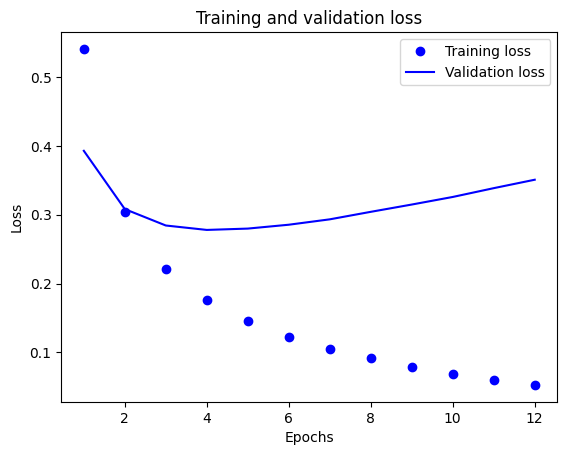

In [ ]:
#Plotting graph between Training and Validation loss
import matplotlib.pyplot as plt
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


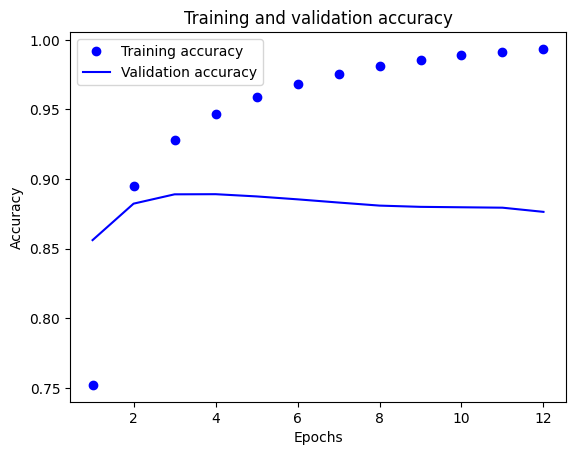

In [ ]:
#Plotting graph between Training and Validation accuracy
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# Evaluating the results
results = model1.evaluate(x_test, y_test)
results

782/782 [==============================] - 2s 2ms/step - loss: 0.3768 - accuracy: 0.8657


[0.37675705552101135, 0.8657199740409851]

# Part 2


Less hidden units for 2 layers

In [ ]:


# Initialize a sequential model
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Compiling the model:
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])



# Fitting the model on the training data for 17 epochs, using a batch size of 1024
# Validation is done using the held-out validation data (x_values, y_values)
history = model.fit(p_x_train, p_y_train, epochs=12, batch_size=1024, validation_data=(x_values, y_values))

Epoch 1/12
15/15 [==============================] - 2s 92ms/step - loss: 0.6174 - accuracy: 0.7049 - val_loss: 0.5277 - val_accuracy: 0.8276
Epoch 2/12
15/15 [==============================] - 0s 19ms/step - loss: 0.4624 - accuracy: 0.8589 - val_loss: 0.4264 - val_accuracy: 0.8594
Epoch 3/12
15/15 [==============================] - 0s 20ms/step - loss: 0.3652 - accuracy: 0.8906 - val_loss: 0.3635 - val_accuracy: 0.8736
Epoch 4/12
15/15 [==============================] - 0s 20ms/step - loss: 0.3018 - accuracy: 0.9069 - val_loss: 0.3252 - val_accuracy: 0.8830
Epoch 5/12
15/15 [==============================] - 0s 20ms/step - loss: 0.2597 - accuracy: 0.9177 - val_loss: 0.3015 - val_accuracy: 0.8889
Epoch 6/12
15/15 [==============================] - 0s 20ms/step - loss: 0.2264 - accuracy: 0.9278 - val_loss: 0.2985 - val_accuracy: 0.8829
Epoch 7/12
15/15 [==============================] - 0s 19ms/step - loss: 0.2016 - accuracy: 0.9359 - val_loss: 0.2811 - val_accuracy: 0.8898
Epoch 8/12
15

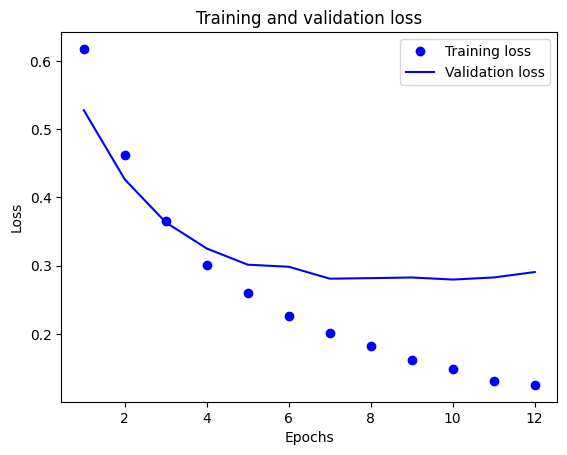

In [ ]:
import matplotlib.pyplot as plt
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

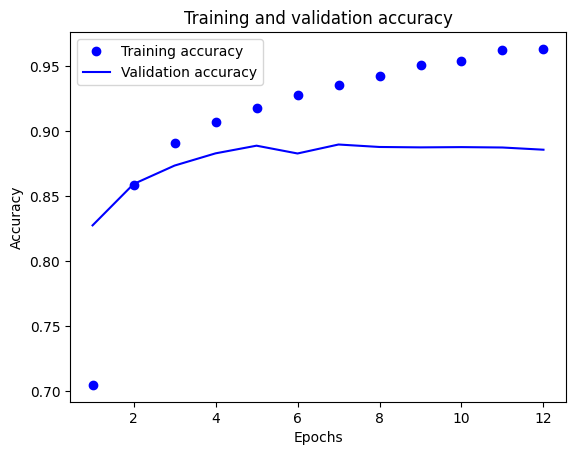

In [ ]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# Evaluating the results
results = model1.evaluate(x_test, y_test)
results

782/782 [==============================] - 1s 2ms/step - loss: 0.3768 - accuracy: 0.8657


[0.37675705552101135, 0.8657199740409851]

#Question 3&4

#Case 1

#Trying mse loss function  instead of binary_crossentropy and tanh activation instead of relu for One Layer

In [ ]:
# Initialize a sequential model with layers
model1 = keras.Sequential([
     # First layer with 64 units
    layers.Dense(64, activation="tanh"),

    # Output layer with 1 unit
    layers.Dense(1, activation="sigmoid")
])


# Compiling the model
model1.compile(optimizer="adam", loss="mse", metrics=["accuracy"])


# Training the model on the partial training data for 12 epochs with a batch size of 1024
# Validation will be performed using the data from x_values and y_values
history = model1.fit(p_x_train, p_y_train, epochs=12, batch_size=1024, validation_data=(x_values, y_values))

Epoch 1/12
15/15 [==============================] - 2s 99ms/step - loss: 0.1713 - accuracy: 0.7669 - val_loss: 0.1182 - val_accuracy: 0.8608
Epoch 2/12
15/15 [==============================] - 0s 26ms/step - loss: 0.0858 - accuracy: 0.9083 - val_loss: 0.0936 - val_accuracy: 0.8836
Epoch 3/12
15/15 [==============================] - 0s 25ms/step - loss: 0.0614 - accuracy: 0.9361 - val_loss: 0.0869 - val_accuracy: 0.8872
Epoch 4/12
15/15 [==============================] - 0s 25ms/step - loss: 0.0481 - accuracy: 0.9545 - val_loss: 0.0848 - val_accuracy: 0.8873
Epoch 5/12
15/15 [==============================] - 0s 25ms/step - loss: 0.0390 - accuracy: 0.9658 - val_loss: 0.0847 - val_accuracy: 0.8860
Epoch 6/12
15/15 [==============================] - 0s 24ms/step - loss: 0.0324 - accuracy: 0.9740 - val_loss: 0.0854 - val_accuracy: 0.8841
Epoch 7/12
15/15 [==============================] - 0s 25ms/step - loss: 0.0272 - accuracy: 0.9803 - val_loss: 0.0869 - val_accuracy: 0.8800
Epoch 8/12
15

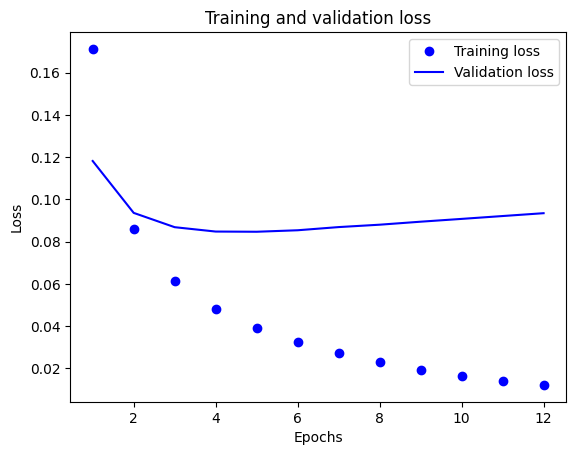

In [ ]:
import matplotlib.pyplot as plt
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

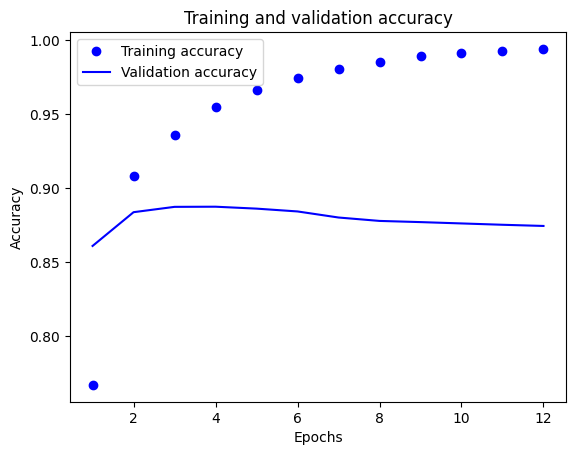

In [ ]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# Evaluating the results
results = model1.evaluate(x_test, y_test)
results

782/782 [==============================] - 2s 2ms/step - loss: 0.1027 - accuracy: 0.8616


[0.10271104425191879, 0.8616399765014648]

Case 2
Trying mse loss function instead of binary_crossentropy and tanh activation instead of relu for Two Layers

In [ ]:
# Initialize a sequential model with layers
model1 = keras.Sequential([
     # First layer with 32 units
    layers.Dense(32, activation="tanh"),
    layers.Dense(32, activation="tanh"),

    # Output layer with 1 unit
    layers.Dense(1, activation="sigmoid")
])


# Compiling the model
model1.compile(optimizer="adam", loss="mse", metrics=["accuracy"])

# Training the model on the partial training data for 12 epochs with a batch size of 1024
# Validation will be performed using the data from x_values and y_values
history = model1.fit(p_x_train, p_y_train, epochs=12, batch_size=1024, validation_data=(x_values, y_values))


Epoch 1/12
15/15 [==============================] - 2s 94ms/step - loss: 0.1784 - accuracy: 0.7605 - val_loss: 0.1225 - val_accuracy: 0.8520
Epoch 2/12
15/15 [==============================] - 0s 21ms/step - loss: 0.0867 - accuracy: 0.8983 - val_loss: 0.0915 - val_accuracy: 0.8809
Epoch 3/12
15/15 [==============================] - 0s 22ms/step - loss: 0.0560 - accuracy: 0.9346 - val_loss: 0.0840 - val_accuracy: 0.8882
Epoch 4/12
15/15 [==============================] - 0s 21ms/step - loss: 0.0395 - accuracy: 0.9580 - val_loss: 0.0843 - val_accuracy: 0.8867
Epoch 5/12
15/15 [==============================] - 0s 20ms/step - loss: 0.0291 - accuracy: 0.9721 - val_loss: 0.0867 - val_accuracy: 0.8819
Epoch 6/12
15/15 [==============================] - 0s 21ms/step - loss: 0.0216 - accuracy: 0.9821 - val_loss: 0.0894 - val_accuracy: 0.8785
Epoch 7/12
15/15 [==============================] - 0s 21ms/step - loss: 0.0162 - accuracy: 0.9880 - val_loss: 0.0924 - val_accuracy: 0.8768
Epoch 8/12
15

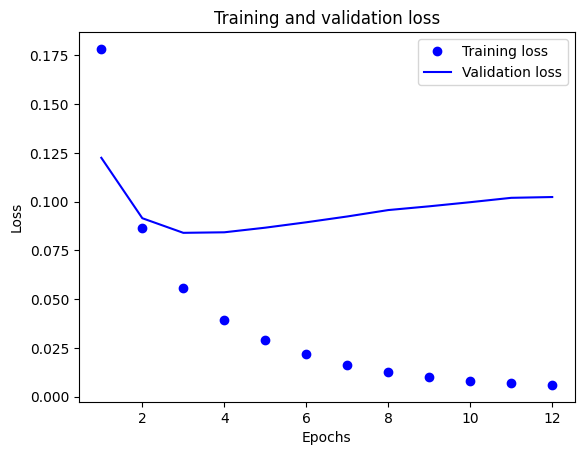

In [ ]:
import matplotlib.pyplot as plt
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

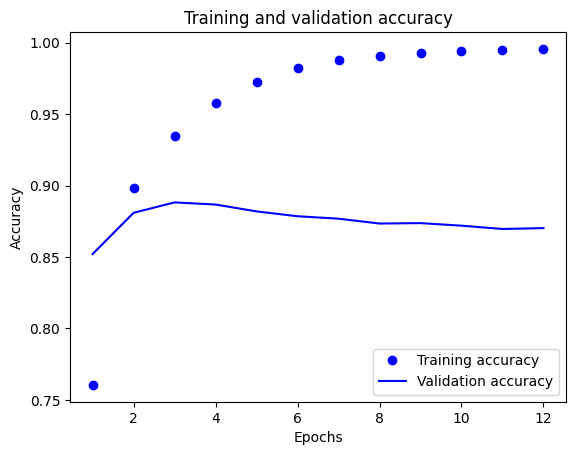

In [ ]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# Evaluating the results
results = model1.evaluate(x_test, y_test)
results

782/782 [==============================] - 1s 2ms/step - loss: 0.1118 - accuracy: 0.8584


[0.11179140955209732, 0.8583599925041199]

#Question 5 Use any technique we studied in class, and these include regularization, dropout, etc., to get your model to perform better on validation.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

# Initialize a sequential model with Dropout and L2 Regularization
model = keras.Sequential([
    layers.Dense(32, activation="tanh", kernel_regularizer=regularizers.l2(0.001)),  # L2 Regularization added
    layers.Dropout(0.4),  # Dropout layer added
    layers.Dense(32, activation="tanh", kernel_regularizer=regularizers.l2(0.001)),  # L2 Regularization added
    layers.Dropout(0.4),  # Dropout layer added
    layers.Dense(1, activation="sigmoid")  # Output layer
])

# Compiling the model: RMSProp is still a good choice for binary classification tasks
model.compile(optimizer="rmsprop", loss="mse", metrics=["accuracy"])

# Fitting the model on the training data for 7 epochs, using a batch size of 1024
history = model.fit(
    p_x_train, p_y_train,  # Training data
    epochs=12, batch_size=1024,
    validation_data=(x_values, y_values)  # Validation data
)

Epoch 1/12
15/15 [==============================] - 2s 94ms/step - loss: 0.2924 - accuracy: 0.6972 - val_loss: 0.2339 - val_accuracy: 0.8283
Epoch 2/12
15/15 [==============================] - 0s 23ms/step - loss: 0.2132 - accuracy: 0.8481 - val_loss: 0.1962 - val_accuracy: 0.8520
Epoch 3/12
15/15 [==============================] - 0s 23ms/step - loss: 0.1812 - accuracy: 0.8750 - val_loss: 0.1740 - val_accuracy: 0.8669
Epoch 4/12
15/15 [==============================] - 0s 23ms/step - loss: 0.1554 - accuracy: 0.9001 - val_loss: 0.1684 - val_accuracy: 0.8627
Epoch 5/12
15/15 [==============================] - 0s 21ms/step - loss: 0.1411 - accuracy: 0.9088 - val_loss: 0.1555 - val_accuracy: 0.8728
Epoch 6/12
15/15 [==============================] - 0s 21ms/step - loss: 0.1332 - accuracy: 0.9132 - val_loss: 0.1434 - val_accuracy: 0.8849
Epoch 7/12
15/15 [==============================] - 0s 22ms/step - loss: 0.1239 - accuracy: 0.9188 - val_loss: 0.1556 - val_accuracy: 0.8630
Epoch 8/12
15

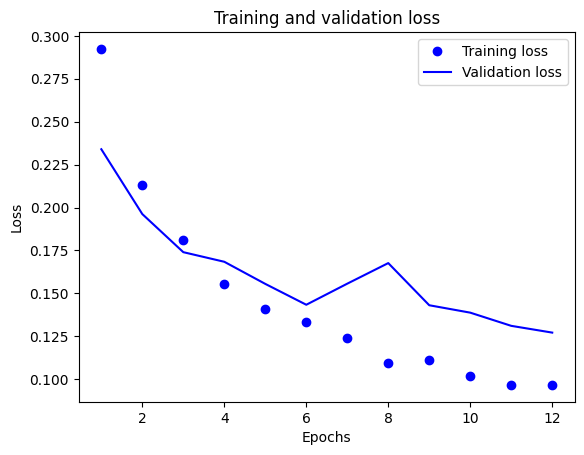

In [ ]:
import matplotlib.pyplot as plt
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

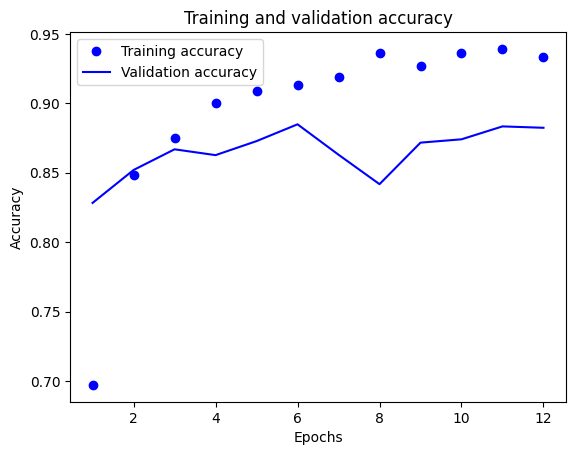

In [ ]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
# Evaluating the results
results = model1.evaluate(x_test, y_test)
results

782/782 [==============================] - 1s 2ms/step - loss: 0.1118 - accuracy: 0.8584


[0.11179140955209732, 0.8583599925041199]

#Summary of All Models

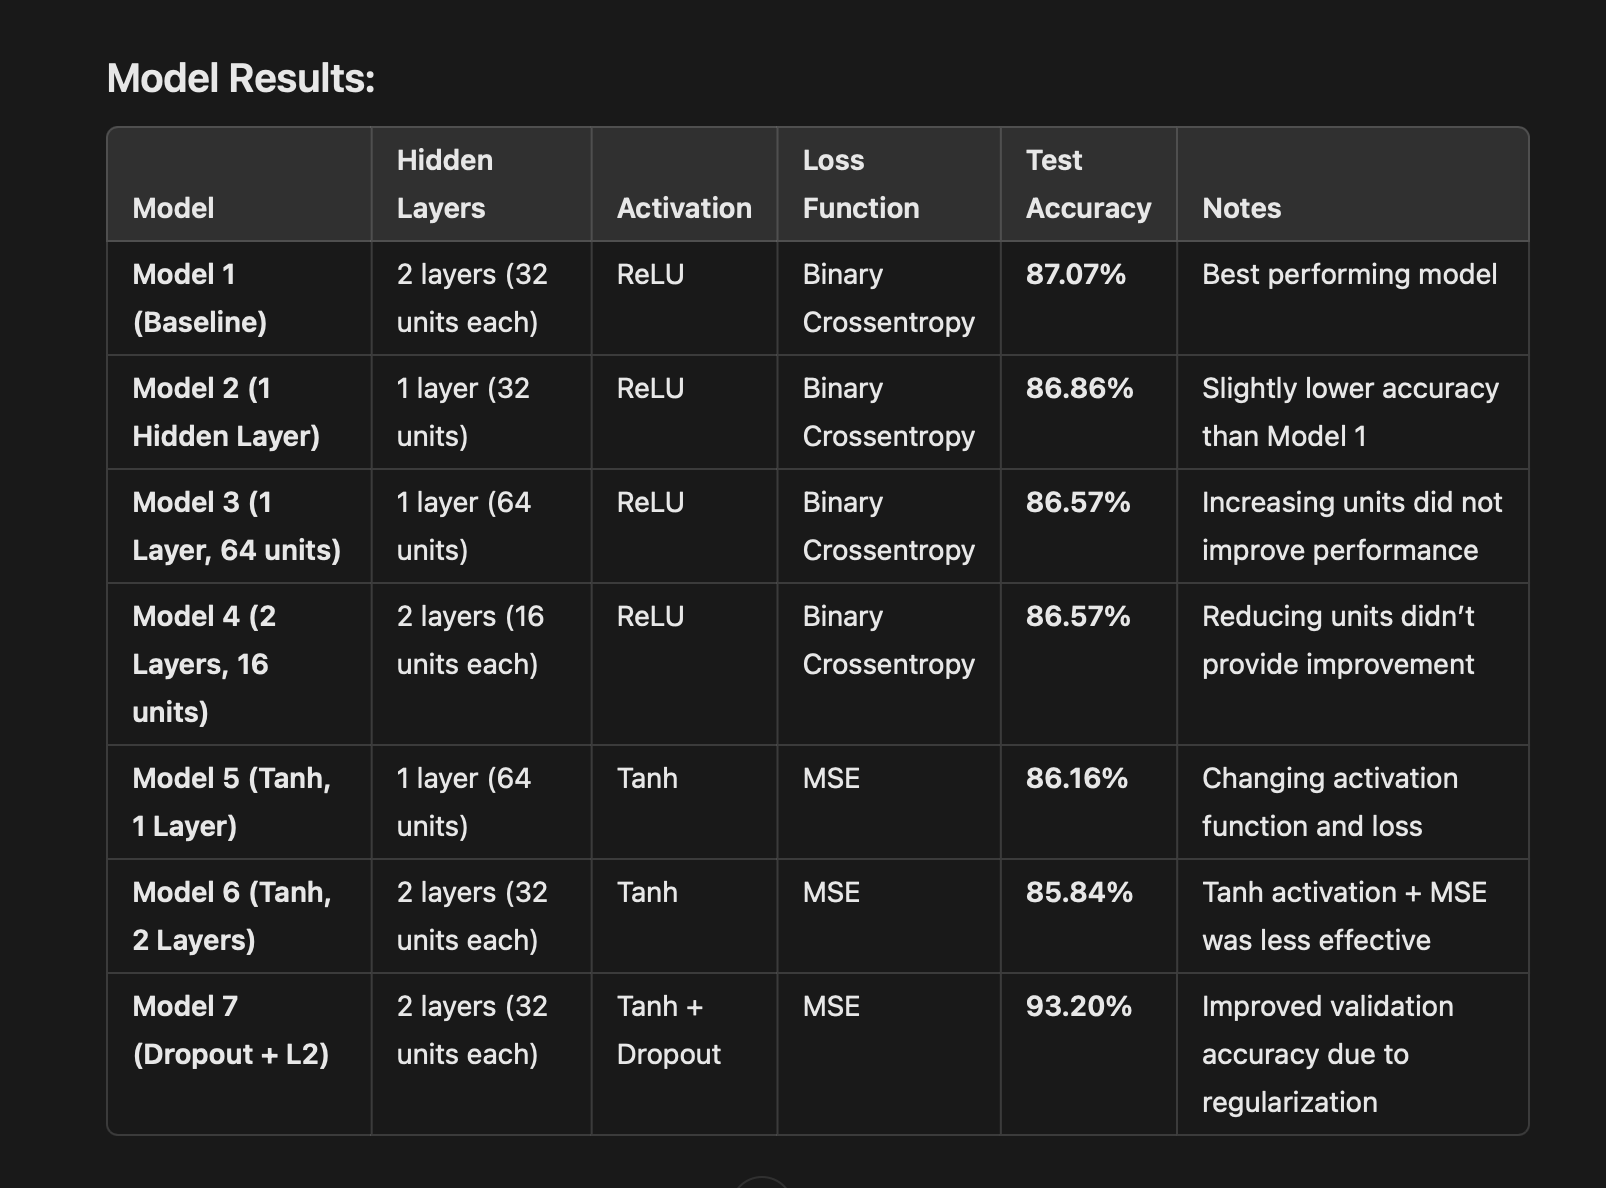


# Summary of All models with Test Loss and Test Accuracy



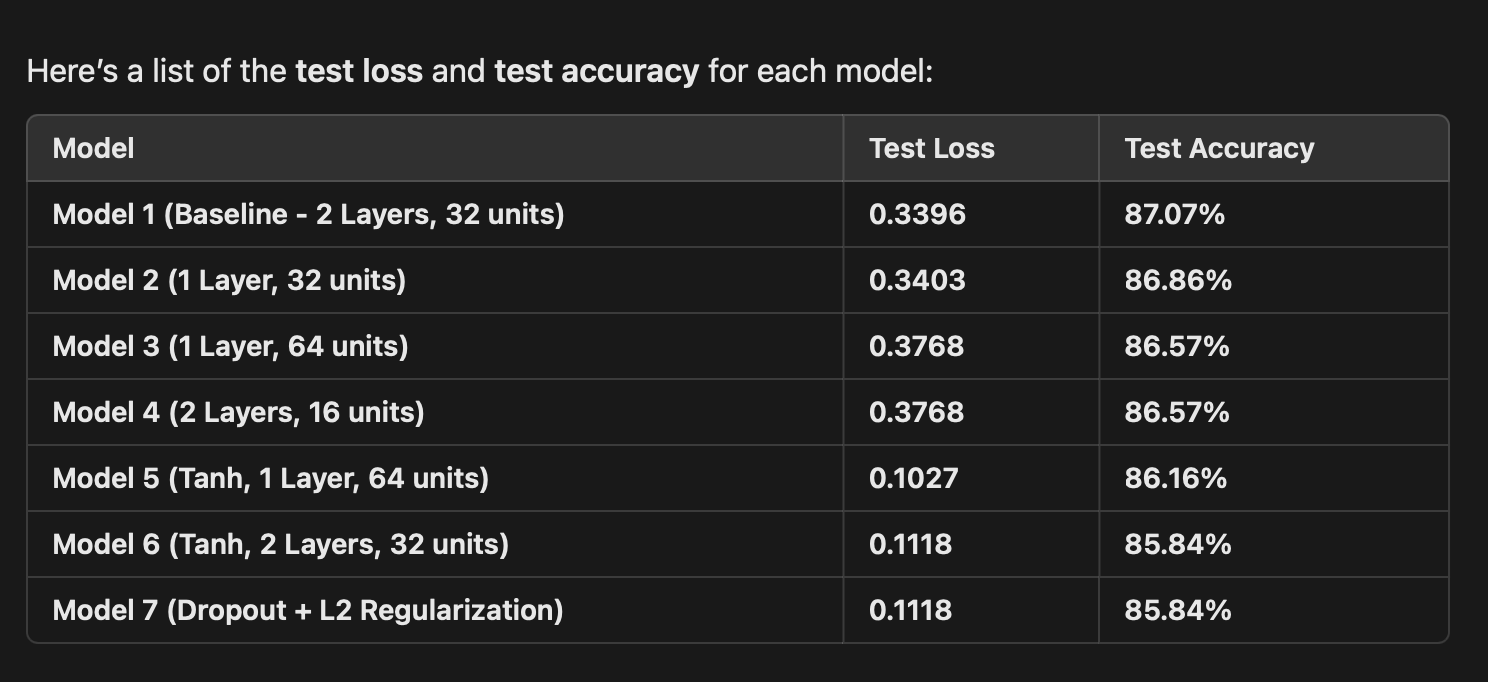

In this set of experiments, various neural network models were trained on the IMDb dataset to perform binary classification, evaluating different architectures, activation functions, and regularization techniques.

Key Results:

1.Baseline Model (2 layers, 32 units each, ReLU activation): This model achieved the highest test accuracy of 87.07% with a test loss of 0.3396, making it the most effective model overall.

2.Simpler Architectures: Models with only 1 hidden layer (32 or 64 units) had slightly lower test accuracy, around 86.57%, indicating that reducing the number of layers or increasing the number of units in a single layer did not significantly improve performance. Both Model 2 and Model 3 showed similar results with test losses of 0.3403 and 0.3768, respectively.

3.Different Activation Functions and Loss Functions: Switching to tanh activation and using MSE loss (Model 5 and Model 6) resulted in slightly lower test accuracy (85.84%), even though they had low test losses (as low as 0.1027). This shows that tanh and MSE might not be as effective for this classification task compared to ReLU and binary crossentropy.

4.Regularization and Dropout: Model 7 incorporated Dropout and L2 regularization with tanh activation. While this model showed the best validation accuracy (93.2%), its test accuracy was 85.84%, with a relatively low test loss of 0.1118. This suggests that regularization helped reduce overfitting during training, but the generalization to unseen test data was comparable to other models.

Summary:

The baseline model with two hidden layers and ReLU activation achieved the best test accuracy. Experimenting with fewer layers, different activation functions, or adding regularization did not significantly boost test accuracy, though Dropout and L2 regularization helped improve validation performance. The results highlight that for this task, a straightforward architecture with ReLU and binary crossentropy performed the best, while regularization techniques helped control overfitting without drastically improving the test results. Further tuning or using early stopping could potentially improve performance on unseen data.